### Using simple Autoencoder on MNIST handwritten numbers dataset

Author: Michael Dolega

Date: Nov 28, 2025

Notes:

The Python code is losely modeled on a GeeksforGeeks tutorial on [autoencoders in machine learning](https://www.geeksforgeeks.org/machine-learning/auto-encoders/).

This code is intended as a practice exercise.

Defining the structure facilitates the understanding of the autoencoder architecture.

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist



In [12]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))   



In [13]:
# Define the autoencoder architecture using convolutional layers
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)    

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



In [ ]:
# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.1942 - val_loss: 0.0886
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0845 - val_loss: 0.0802
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0793 - val_loss: 0.0769
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0768 - val_loss: 0.0760
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0753 - val_loss: 0.0742
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0742 - val_loss: 0.0730
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0734 - val_loss: 0.0723
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0727 - val_loss: 0.0717
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0722 - val_loss: 0.0713
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0717 - val_loss: 0.0709


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


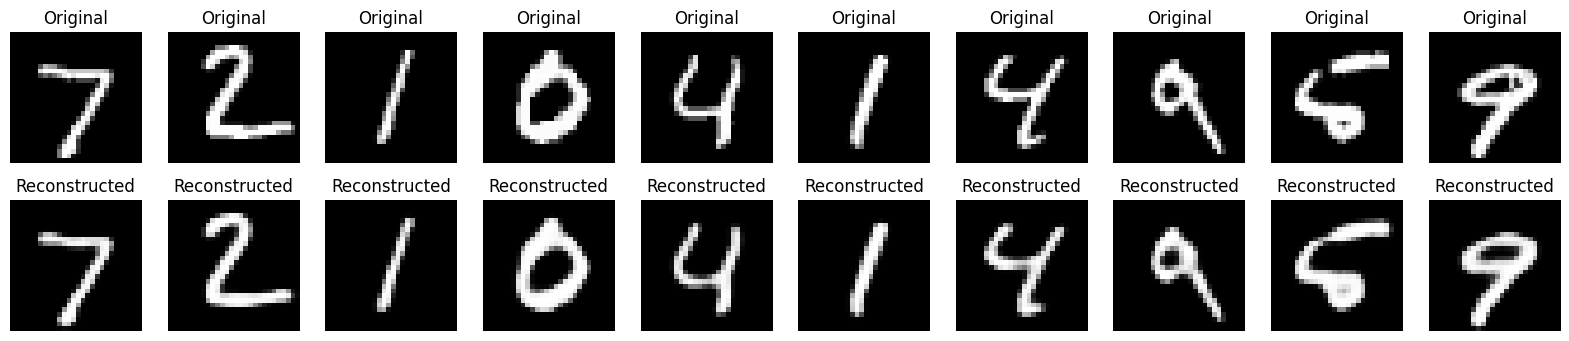

In [ ]:
# Evaluate the autoencoder
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off') 
plt.show()